iter = 0 --- best = 3.2084287555724846 --- alpha = [1.74723189 1.5751578  0.61924073]
iter = 9 --- best = 0.000252508145712617 --- alpha = [0.02108261 0.02333513 0.00714496]
iter = 18 --- best = 1.9209859806155984e-08 --- alpha = [0.00012032 0.0001449  0.00015554]
iter = 27 --- best = 2.2286540193593937e-12 --- alpha = [2.41351263e-06 1.89828554e-06 3.58806946e-07]
iter = 36 --- best = 3.4142050470288264e-15 --- alpha = [4.95519860e-08 5.93216529e-08 1.80259295e-09]
iter = 45 --- best = 1.14291233724569e-16 --- alpha = [8.12987110e-09 7.01158643e-09 3.14143233e-09]


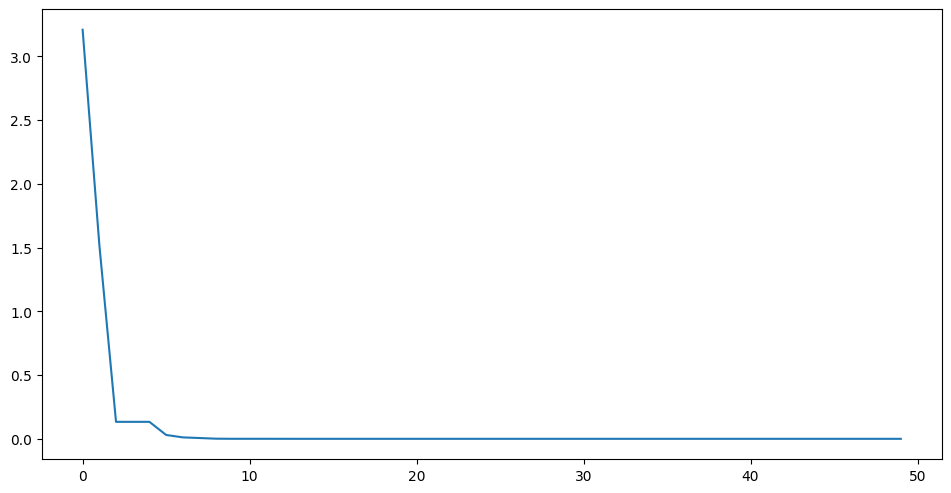

In [10]:
#p1 : ingredients
import numpy as np
import random
import matplotlib.pyplot as plt
lowerbound , uperbound = 0 , 10
n_population , n_variables , maxiter = 50 , 3 , 50
#population
pop = np.zeros((n_population,2,n_variables))
result = np.zeros(maxiter)
a = 2-np.linspace(0,2,maxiter)
x1,x2,x3 = np.zeros((n_variables)) , np.zeros((n_variables)) , np.zeros((n_variables))
xnew = np.zeros((n_variables))
#indexes
positon , fitness = 0 , 1
#p2: function---------------------------------------------------------------------------------------------------------
def sphere(x):
    return np.sum(x**2)
#p3 : random population-----------------------------------------------------------------------------------------------
for i in range(n_population):
    pop[i][positon] = np.random.uniform(lowerbound,uperbound,n_variables) 
    pop[i][fitness][0] = sphere(pop[i][positon])
pop = pop[np.argsort(pop[: , fitness , 0])]
#main loop------------------------------------------------------------------------------------------------------------
for i in range(maxiter):    
    alpha= pop[0]
    beta = pop[1]
    delta = pop[2]
    for k in range(n_population):        
        A1, A2, A3 = (2 * a[i] * random.random()) - a[i] , (2 * a[i] * random.random()) - a[i], (2 * a[i] * random.random())- a[i]
        C1, C2, C3 = 2 * random.random(), 2*random.random(), 2*random.random()
        x1 = alpha[positon] - (A1 * abs(C1*alpha[positon] - pop[k][positon]))
        x2 = beta[positon] - (A2 * abs(C2*beta[positon] - pop[k][positon]))
        x3 = delta[positon] - (A3 * abs(C3*delta[positon] - pop[k][positon]))
        xnew = (x1 + x2 + x3)/3
        if random.random() > (float(i/maxiter)) :
            index = random.randint(0,n_variables-1)
            A1, A2, A3 = (2 * a[i] * random.random()) - a[i] , (2 * a[i] * random.random()) - a[i], (2 * a[i] * random.random())- a[i]
            C1, C2, C3 = 2 * random.random(), 2*random.random(), 2*random.random()
            x1[index] = alpha[positon][index] - (A1 * abs(C1*alpha[positon][index] - pop[k][positon][index]))
            x2[index] = beta[positon][index] - (A2 * abs(C2*beta[positon][index] - pop[k][positon][index]))
            x3[index] = delta[positon][index] - (A3 * abs(C3*delta[positon][index] - pop[k][positon][index]))
            xnew[index] = (x1[index] + x2[index] + x3[index])/3               
        fnew = sphere(xnew)    
        if pop[k][fitness][0] > fnew and all(xnew > lowerbound) and all(xnew < uperbound):
            pop[k][fitness][0] = fnew
            pop[k][positon] = xnew            
    pop = pop[np.argsort(pop[: , fitness , 0])] 
    result[i] = pop[0][fitness][0]
    if i % 9 == 0 :print(f"iter = {i} --- best = {result[i]} --- alpha = {alpha[positon]}")    
fig = plt.figure(figsize=(10,5))
axs = fig.add_axes([0,0,0.9,0.9])
axs.plot(np.arange(maxiter),result )

iter = 0   ,  ,  , best = 31.611765447517783 , ,,,, [3.004229   4.08886497 2.42230404]


iter = 10   ,  ,  , best = 13.821705529668566 , ,,,, [2.01909786 2.05650731 2.00930589]
iter = 20   ,  ,  , best = 13.821705529668566 , ,,,, [2.01909786 2.05650731 2.00930589]
iter = 30   ,  ,  , best = 12.115519188292865 , ,,,, [2.00005733 2.00551231 2.011949  ]
iter = 40   ,  ,  , best = 12.115519188292865 , ,,,, [2.00005733 2.00551231 2.011949  ]
time=0.06478357315063477


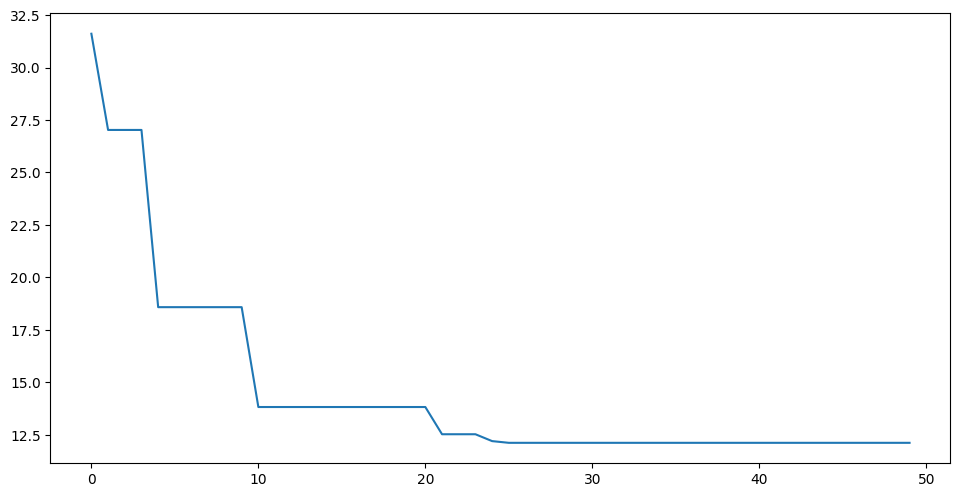

In [11]:
#ingredients
import numpy as np
import random
import matplotlib.pyplot as plt
import time
nvar = 3
lb = 2
ub = 10
npop =50
maxiter = 50
pop = np.zeros((npop,2,nvar))
#indexes
pos , fitness = 0 , 1
#function -------------------------------------------------------------
def sphere(x):
    return np.sum(x**2)
#random pop------------------------------------------------------------
wolfs = np.zeros((3,2,nvar))
for i in range(npop):
    pop[i][pos] = np.random.uniform(lb,ub,nvar) 
    pop[i][fitness][0] = sphere(pop[i][pos])
pop = pop[np.argsort(pop[: , fitness , 0])]
#main loop-------------------------------------------------------------
tic = time.time()
result = np.zeros(maxiter)
a = 1-np.linspace(0,2,maxiter)
x1,x2,x3 = np.zeros((nvar)) , np.zeros((nvar)) , np.zeros((nvar))
xnew = np.zeros((nvar))
for i in range(maxiter):    
    alpha= pop[np.argsort(pop[: , fitness , 0])][0]
    beta = pop[np.argsort(pop[: , fitness , 0])][1]
    delta = pop[np.argsort(pop[: , fitness , 0])][2]
    for k in range(npop):        
        for j in range(nvar):
            A1, A2, A3 = (2 * a[i] * random.random()) - a[i] , (2 * a[i] * random.random()) - a[i], (2 * a[i] * random.random())- a[i]
            C1, C2, C3 = 2 * random.random(), 2*random.random(), 2*random.random()
            x1[j] = alpha[pos][j] - (A1 * abs(C1*alpha[pos][j] - pop[k][pos][j]))
            x2[j] = beta[pos][j] - (A2 * abs(C2*beta[pos][j] - pop[k][pos][j]))
            x3[j] = delta[pos][j] - (A3 * abs(C3*delta[pos][j] - pop[k][pos][j]))
            xnew[j] = (x1[j] + x2[j] + x3[j])/3
        
        
        fnew = sphere(xnew)
        
        if pop[k][fitness][0] > fnew and all(xnew > lb) and all(xnew < ub):
            pop[k][fitness][0] = fnew
            pop[k][pos] = xnew
    
 
    result[i] = pop[0][fitness][0]
    if i % 10 == 0 :print(f"iter = {i}   ,  ,  , best = {result[i]} , ,,,, {alpha[pos]}")
toc = time.time()
time = toc-tic
print(f"time={time}")
fig = plt.figure(figsize=(10,5))
axs = fig.add_axes([0,0,0.9,0.9])
axs.plot(np.arange(maxiter),result )